In [29]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm

import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import pyrrhenious as pyhhrenious
import checking_author as check_auth
file = '../Database/publication_database.csv'

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
ecdatabase.create_anisotropic_models()
model_names = ecdatabase.get_model_list_for_phase('clinopyroxene')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/mineral_ensembles/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['huebner88_dk7_cpx[100]',
 'huebner88_dk7_cpx[010]',
 'huebner88_dk7_cpx[001]',
 'huebner88_mal_cpx[100]',
 'huebner88_mal_cpx[010]',
 'xu_1999_cpx',
 'yang_11b_dry_cpx',
 'yang_11b_wet_cpx',
 'yang_11b_nat_cpx',
 'ymcc_12_dry_cpx',
 'ymcc_12_wet_cpx',
 'yang_12b_cpx[100]',
 'yang_12b_cpx[010]',
 'yang_12b_cpx[001]',
 'isotropic_model:huebner88_dk7_cpx[100]+huebner88_dk7_cpx[010]+huebner88_dk7_cpx[001]',
 'isotropic_model:huebner88_mal_cpx[100]+huebner88_mal_cpx[010]',
 'isotropic_model:yang_12b_cpx[100]+yang_12b_cpx[010]+yang_12b_cpx[001]']

# Exploring Pyrrhenious's Wadsleyite Ensembles

Here we look at Wadsleyite models parameterization correspondence of:

 * Yoshino et al., 2008. Dry mantle transition zone inferred from the conductivity of wadsleyite and ringwoodite

 * Takashi Yoshino and Tomoo Katsura 2012. Re-evaluation of electrical conductivity of anhydrous and hydrous wadsleyite
  
 * Sun et al., 2018. Supercritical fluid in the mantle transition zone deduced from H–D interdiffusion of wadsleyite
 
In order to match the results of Yoshino and Katusra 2012, The small polaron conduction enthalpy had to be increased from 1.45 to 1.5, the water exponent in proton conduction was set to one, and the alpha value in the exponent had to be increased from 0.02 to 0.2. Sun et al. 2018 also had significant revisions to the preexponential constants and enthalpy in order to match both the diffusion and conductivity data, albeit within the stdev reported.

## Dry Trends

Only the models of Yoshino et al., 2008 and Yoshino and Katsura 2012 are used for dry. Sun et al., 2018 used Yoshino 2008's dry polaron conduction as a basis for dry conductivity, so the Sun result is not applicable

Text(0, 0.5, 'log10(sigma)')

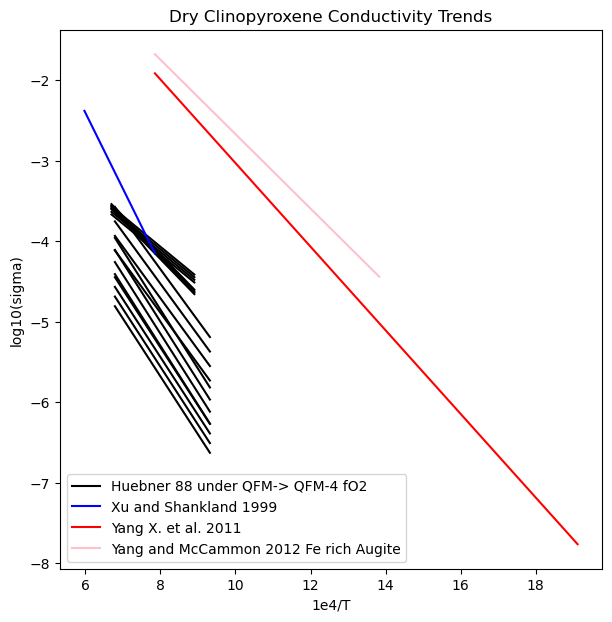

In [7]:
import matplotlib.cm as cm
t = np.linspace(773,2273,num=100)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('clinopyroxene')
fix, ax = plt.subplots(figsize=(7,7))
for i, model in enumerate(filter(lambda x : 'hueb' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,0)-2
    for offset in range(0,4):
        ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,logfo2=logfo2-offset)),
           color='black')


for i, model in enumerate(filter(lambda x : 'xu' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    pressure = ec_model_row['pressure_average'].values.astype(float)
        
    if pressure< 0.001:
        pressure = 0
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=0)),color='blue')
    
for i, model in enumerate(filter(lambda x : 'yang_11b_dry_cpx' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    pressure = ec_model_row['pressure_average'].values.astype(float)
        
    if pressure< 0.001:
        pressure = 0
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=0)),color='red')
    
for i, model in enumerate(filter(lambda x : 'ymcc_12_dry_cpx' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    pressure = ec_model_row['pressure_average'].values.astype(float)
        
    if pressure< 0.001:
        pressure = 0
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=0)),color='pink')
    
plt.plot([],[],label='Huebner 88 under QFM-> QFM-4 fO2',color='black')
plt.plot([],[],label='Xu and Shankland 1999',color='blue')
plt.plot([],[],label='Yang X. et al. 2011',color='red')
plt.plot([],[],label='Yang and McCammon 2012 Fe rich Augite',color='pink')
plt.legend(loc='lower left')
plt.title('Dry Clinopyroxene Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')


In [7]:
temperature_range_extended = np.linspace(600,2200,num=2200-600+1,dtype=float).ravel()
models = []
model_ext = []
for i, model in enumerate(filter(lambda x : 'hueb' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range_1 = np.arange(int(ec_model_row['temp_mink'].values[0]),
                                    int(ec_model_row['temp_maxk'].values[0])+1,1,dtype=float).ravel()
    ec1 = ec_model.get_conductivity(T=temperature_range_1,Cw=0,logfo2 = pyrutils.calc_QFM(temperature_range_1,0))
    ec2 = ec_model.get_conductivity(T=temperature_range_1,Cw=0,logfo2 = pyrutils.calc_QFM(temperature_range_1,0)-4)
    
    ec1_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0,logfo2 = pyrutils.calc_QFM(temperature_range_extended,0))
    ec2_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0,logfo2 = pyrutils.calc_QFM(temperature_range_extended,0)-4)
    
    models.append(pd.Series(ec1,index = temperature_range_1,name=model))
    models.append(pd.Series(ec2,index = temperature_range_1,name=model+'qfm-4'))
    model_ext.append(pd.Series(ec1_ext,index = temperature_range_extended,name=model+'ext'))
    model_ext.append(pd.Series(ec2_ext,index = temperature_range_extended,name=model+'ext qfm-4'))
    
for i, model in enumerate(filter(lambda x : 'xu' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range_2 = np.arange(int(ec_model_row['temp_mink'].values[0]),
                                    int(ec_model_row['temp_maxk'].values[0])+1,dtype=float).ravel()
    ec1 = ec_model.get_conductivity(T=temperature_range_2,Cw=0)
    ec1_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0)

    models.append(pd.Series(ec1,index = temperature_range_2,name='xu'))
    model_ext.append(pd.Series(ec1_ext,index = temperature_range_extended,name='xu_ext'))

for i, model in enumerate(filter(lambda x : 'yang_11b_cpx_dry' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range_2 = np.arange(int(ec_model_row['temp_mink'].values[0]),
                                    int(ec_model_row['temp_maxk'].values[0])+1,dtype=float).ravel()
    ec1 = ec_model.get_conductivity(T=temperature_range_2,Cw=0)
    ec1_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0)

    models.append(pd.Series(ec1,index = temperature_range_2,name='yang11_dry'))
    model_ext.append(pd.Series(ec1_ext,index = temperature_range_extended,name='yang11_dry_ext'))
    
for i, model in enumerate(filter(lambda x : 'YMcC_12_cpx_dry' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range_2 = np.arange(int(ec_model_row['temp_mink'].values[0]),
                                    int(ec_model_row['temp_maxk'].values[0])+1,dtype=float).ravel()
    ec1 = ec_model.get_conductivity(T=temperature_range_2,Cw=0)
    ec1_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0)

    models.append(pd.Series(ec1,index = temperature_range_2,name='YMcC'))
    model_ext.append(pd.Series(ec1_ext,index = temperature_range_extended,name='YMcC_ext'))

In [8]:
within_experiments = np.log10(pd.concat(models,axis=1).sort_index())
extrapolated = np.log10(pd.concat(model_ext,axis=1).sort_index())
extrapolated

,huebner88_dk7[100]ext,huebner88_dk7[100]ext qfm-4,huebner88_dk7[010]ext,huebner88_dk7[010]ext qfm-4,huebner88_dk7[001]ext,huebner88_dk7[001]ext qfm-4,huebner88_mal[100]ext,huebner88_mal[100]ext qfm-4,huebner88_mal[010]ext,huebner88_mal[010]ext qfm-4,huebner88_dk7_anisomodelext,huebner88_dk7_anisomodelext qfm-4,huebner88_mal_anisomodelext,huebner88_mal_anisomodelext qfm-4,xu_ext,yang11_dry_ext,YMcC_ext
600.0,-10.696710,-9.976710,-12.098918,-11.618918,-11.922814,-11.322814,-7.630563,-7.510563,-8.373486,-8.293486,-11.572814,-10.972814,-8.002025,-7.902025,-12.457309,-6.524143,-5.754141
601.0,-10.679149,-9.959149,-12.079067,-11.599067,-11.902527,-11.302527,-7.619783,-7.499783,-8.360264,-8.280264,-11.553581,-10.953581,-7.990024,-7.890024,-12.431173,-6.509693,-5.741322
602.0,-10.661646,-9.941646,-12.059281,-11.579281,-11.882307,-11.282307,-7.609040,-7.489040,-8.347085,-8.267085,-11.534411,-10.934411,-7.978062,-7.878062,-12.405125,-6.495292,-5.728546
603.0,-10.644201,-9.924201,-12.039561,-11.559561,-11.862155,-11.262155,-7.598331,-7.478331,-8.333950,-8.253950,-11.515306,-10.915306,-7.966141,-7.866141,-12.379163,-6.480938,-5.715812
604.0,-10.626814,-9.906814,-12.019907,-11.539907,-11.842069,-11.242069,-7.587659,-7.467659,-8.320859,-8.240859,-11.496263,-10.896263,-7.954259,-7.854259,-12.353287,-6.466632,-5.703120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196.0,-3.026019,-2.306019,-3.427959,-2.947959,-3.061552,-2.461552,-2.922135,-2.802135,-2.597953,-2.517953,-3.171843,-2.571843,-2.760044,-2.660044,-1.041614,-0.212717,-0.154957
2197.0,-3.024706,-2.304706,-3.426475,-2.946475,-3.060035,-2.460035,-2.921330,-2.801330,-2.596965,-2.516965,-3.170406,-2.570406,-2.759147,-2.659147,-1.039661,-0.211637,-0.153998
2198.0,-3.023395,-2.303395,-3.424993,-2.944993,-3.058520,-2.458520,-2.920525,-2.800525,-2.595977,-2.515977,-3.168969,-2.568969,-2.758251,-2.658251,-1.037709,-0.210558,-0.153041
2199.0,-3.022085,-2.302085,-3.423512,-2.943512,-3.057007,-2.457007,-2.919721,-2.799721,-2.594991,-2.514991,-3.167534,-2.567534,-2.757356,-2.657356,-1.035760,-0.209480,-0.152085


In [9]:
within_experiments.sort_index(inplace=True)
within_experiments

,huebner88_dk7[100],huebner88_dk7[100]qfm-4,huebner88_dk7[010],huebner88_dk7[010]qfm-4,huebner88_dk7[001],huebner88_dk7[001]qfm-4,huebner88_mal[100],huebner88_mal[100]qfm-4,huebner88_mal[010],huebner88_mal[010]qfm-4,huebner88_dk7_anisomodel,huebner88_dk7_anisomodelqfm-4,huebner88_mal_anisomodel,huebner88_mal_anisomodelqfm-4,xu,yang11_dry,YMcC
523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.802687,NaN
524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.783675,NaN
525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.764734,NaN
526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.745866,NaN
527.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.727069,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.396726,NaN,NaN
1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.393344,NaN,NaN
1671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.389967,NaN,NaN
1672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.386594,NaN,NaN


## Wet vs Dry Clinopyroxene Trends

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75959/1042746323.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.plot(1e4/temperature_range,np.log10(c),color=cm.get_cmap('cool_r')(i/(len(water)+1)),alpha=alpha)
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75959/1042746323.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  np.log10(c),linestyle=linestyle,linewidth=linewidth,color=cm.get_cmap('cool_r')(3/(len(water)+1)))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75959/1042746323.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two mino

Text(0, 0.5, 'log10(sigma)')

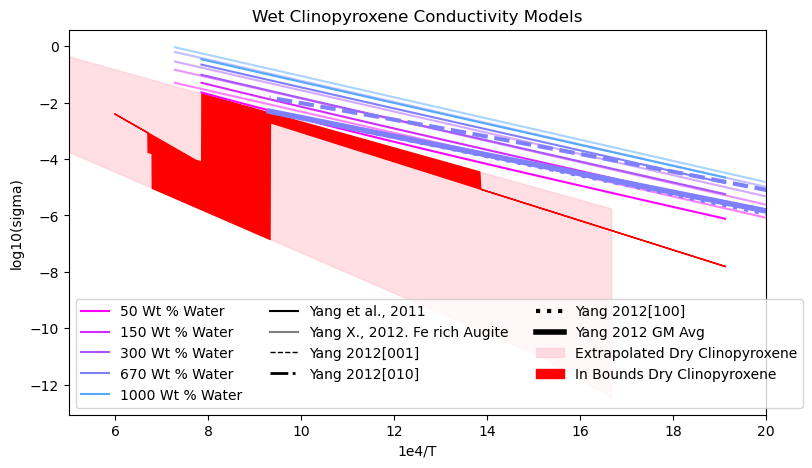

In [11]:
fix, ax = plt.subplots(figsize=(9,5))
water = [50,150,300,670,1000]
for model in ['YMcC_12_cpx_wet','yang_11b_cpx_wet']:
    for i, w in enumerate(water):
        ec_model_row = ecdatabase.get_model_properties(model)
        ec_model = ecdatabase.get_model(model)
        temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
        c = ec_model.get_conductivity(T=temperature_range,Cw=w,co2=0)
        if 'YMcC' in model:
            alpha = 0.5
        else:
            alpha = 1
        ax.plot(1e4/temperature_range,np.log10(c),color=cm.get_cmap('cool_r')(i/(len(water)+1)),alpha=alpha)
for model in ['yang_12b_cpx[001]','yang_12b_cpx[010]','yang_12b_cpx[100]','yang_12b_cpx_anisomodel']:
    linewidth=3
    if '001' in model:
        linestyle='--'
    elif '010' in model:
        linestyle='-.'
    elif '100' in model:
        linestyle=':'
    else:
        linestyle='-'
        linewidth=4
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ecdatabase.get_model(model)
    c = ec_model.get_conductivity(T=temperature_range,co2=0)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    ax.plot(1e4/temperature_range,
            np.log10(c),linestyle=linestyle,linewidth=linewidth,color=cm.get_cmap('cool_r')(3/(len(water)+1)))

for i, ppm_h2o in enumerate(water):
    c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o*1e4,co2=0)
    ax.plot([],[],label=f'{ppm_h2o} Wt % Water',color=cm.get_cmap('cool_r')(i/(len(water)+1)))
plt.plot([],[],linestyle='-',label='Yang et al., 2011',color='black')
plt.plot([],[],linestyle='-',label='Yang X., 2012. Fe rich Augite',color='black',alpha=0.5)
plt.plot([],[],linestyle='--',label='Yang 2012[001]',linewidth=1,color='black')
plt.plot([],[],linestyle='-.',label='Yang 2012[010]',linewidth=2,color='black')

plt.plot([],[],linestyle=':',label='Yang 2012[100]',linewidth=3,color='black')
plt.plot([],[],linestyle='-',label='Yang 2012 GM Avg',linewidth=4,color='black')

ax.fill_between(1e4/extrapolated.index, 
                extrapolated.min(axis=1)-extrapolated.min(axis=1)*1e-3,
                extrapolated.max(axis=1),label='Extrapolated Dry Clinopyroxene',color='pink',alpha=0.5) 
ax.fill_between(1e4/within_experiments.index, 
                within_experiments.min(axis=1)-within_experiments.min(axis=1)*1e-3,
                within_experiments.max(axis=1),label='In Bounds Dry Clinopyroxene',color='red') 
plt.xlim([5,20])
#plt.ylim([-8,2])
plt.legend(ncol=3)
plt.title('Wet Clinopyroxene Conductivity Models')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')

# Crustal Clinopyroxenes

In [ ]:
model_names = ['yang_11b_dry_cpx',
 'yang_11b_wet_cpx',
 'yang_11b_nat_cpx',
 'ymcc_12_dry_cpx',
 'ymcc_12_wet_cpx',
 'yang_12b_cpx[100]',
 'yang_12b_cpx[010]',
 'yang_12b_cpx[001]',
 'isotropic_model:yang_12b_cpx[100]+yang_12b_cpx[010]+yang_12b_cpx[001]']
    
    
fix, ax = plt.subplots(figsize=(9,5))
water = [50,150,300,670,1000]
for model in ['YMcC_12_cpx_wet','yang_11b_cpx_wet']:
    for i, w in enumerate(water):
        ec_model_row = ecdatabase.get_model_properties(model)
        ec_model = ecdatabase.get_model(model)
        temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
        c = ec_model.get_conductivity(T=temperature_range,Cw=w,co2=0)
        if 'YMcC' in model:
            alpha = 0.5
        else:
            alpha = 1
        ax.plot(1e4/temperature_range,np.log10(c),color=cm.get_cmap('cool_r')(i/(len(water)+1)),alpha=alpha)
for model in ['yang_12b_cpx[001]','yang_12b_cpx[010]','yang_12b_cpx[100]','yang_12b_cpx_anisomodel']:
    linewidth=3
    if '001' in model:
        linestyle='--'
    elif '010' in model:
        linestyle='-.'
    elif '100' in model:
        linestyle=':'
    else:
        linestyle='-'
        linewidth=4
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ecdatabase.get_model(model)
    c = ec_model.get_conductivity(T=temperature_range,co2=0)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    ax.plot(1e4/temperature_range,
            np.log10(c),linestyle=linestyle,linewidth=linewidth,color=cm.get_cmap('cool_r')(3/(len(water)+1)))

for i, ppm_h2o in enumerate(water):
    c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o*1e4,co2=0)
    ax.plot([],[],label=f'{ppm_h2o} Wt % Water',color=cm.get_cmap('cool_r')(i/(len(water)+1)))
plt.plot([],[],linestyle='-',label='Yang et al., 2011',color='black')
plt.plot([],[],linestyle='-',label='Yang X., 2012. Fe rich Augite',color='black',alpha=0.5)
plt.plot([],[],linestyle='--',label='Yang 2012[001]',linewidth=1,color='black')
plt.plot([],[],linestyle='-.',label='Yang 2012[010]',linewidth=2,color='black')

plt.plot([],[],linestyle=':',label='Yang 2012[100]',linewidth=3,color='black')
plt.plot([],[],linestyle='-',label='Yang 2012 GM Avg',linewidth=4,color='black')

plt.xlim([5,20])
#plt.ylim([-8,2])
plt.legend(ncol=3)
plt.title('Crustal Clinopyroxene Conductivity Models')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')

In [116]:
def format_line_for_publication(water,water_uniques, unit, model_name):
    if unit=='wtpct':
        water*=1e4
    ppm_water_index = water_uniques.index(np.round(water/100,2)*100)
    color=cm.get_cmap('cool_r')(ppm_water_index/(len(water_uniques)+1))
    
    wet_models = ['yang_11b_wet_cpx','yang_11b_nat_cpx','ymcc_12_wet_cpx']
    if 'isotropic' in model_name or 'dry' in model_name:
        linewidth=2
        linestyle='-'
    elif 'nat' in model_name:
        linewidth=0.5
        linestyle='-'
    elif '11b' in model_name:
        linewidth=0.5
        linestyle='--'
    elif '12_wet' in model_name:
        linewidth=0.5
        linestyle=':'
    elif '[1' in model_name:
        linewidth=1
        linestyle=':'
    elif '1]' in model_name:
        linewidth=1
        linestyle='--'
    elif '010' in model_name:
        linewidth=1
        linestyle='-.'
    else:
        linewidth=1
        linestyle=':'
    return {'color':color,'linestyle':linestyle,'linewidth':linewidth}

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_30322/2593813340.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=cm.get_cmap('cool_r')(ppm_water_index/(len(water_uniques)+1))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_30322/4272743630.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=cm.get_cmap('cool_r')(ppm_water_index/(len(water_uniques)+1))


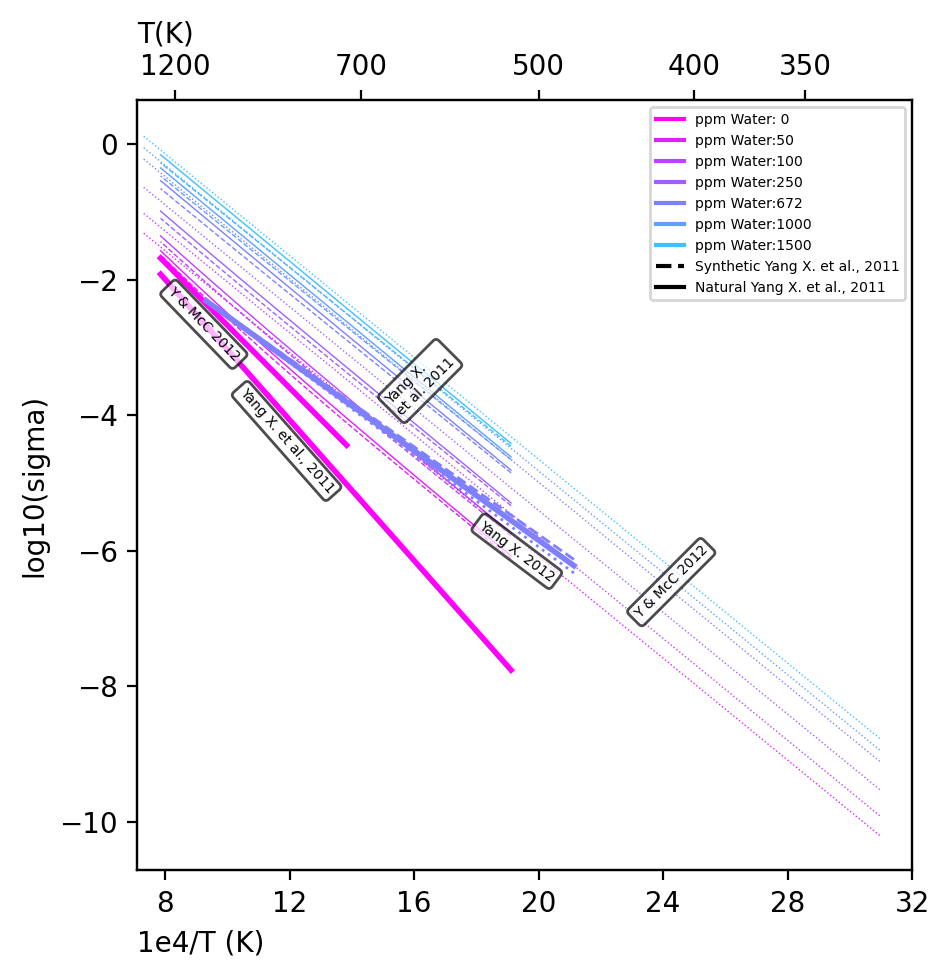

In [188]:
model_names = ['yang_11b_dry_cpx',
 'yang_11b_wet_cpx',
 'yang_11b_nat_cpx',
 'ymcc_12_dry_cpx',
 'ymcc_12_wet_cpx',
 'yang_12b_cpx[100]',
 'yang_12b_cpx[010]',
 'yang_12b_cpx[001]',
 'isotropic_model:yang_12b_cpx[100]+yang_12b_cpx[010]+yang_12b_cpx[001]']
water_uniques = []
for model_name in model_names:
    ec_model_row = ecdatabase.get_model_properties(model_name)
    ecmodel = ecdatabase.get_model(model_name)
    if not ecmodel.uses_water:
        water_average = ec_model_row['water_average'].values[0]
        water_units = ec_model_row['water_units'].values[0]
        if water_units=='wtpct':
            water_average*=1e4
        water_uniques.append(np.round(water_average/100,2)*100)
water_uniques = sorted(list(set(water_uniques + [50,100,250,1000,1500])))
fig, ax = plt.subplots(figsize=(5,5),dpi=200)
for model_name in model_names:
    ec_model_row = ecdatabase.get_model_properties(model_name)
    ecmodel = ecdatabase.get_model(model_name)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    if not ecmodel.uses_water:
        water_average = ec_model_row['water_average'].values[0]
        water_units = ec_model_row['water_units'].values[0]
        line_kwargs = format_line_for_publication(water_average, water_uniques, water_units, model_name)
        c = np.log10(ecmodel.get_conductivity(T=temperature_range))
        ax.plot(1e4/temperature_range,c,**line_kwargs)
    else:
        for water in water_uniques[1:]:
            
            line_kwargs = format_line_for_publication(water, water_uniques, 'ppm', model_name)
            c = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=water))
            ax.plot(1e4/temperature_range,c,**line_kwargs)
           
        
bbox_dict = dict(facecolor='white',alpha=0.7, edgecolor='black', boxstyle='round')
x_ticks = np.arange(8,32.1,4)
x_ticks2 = 1e4/np.asarray([350,400,500,700,1200])
for water in water_uniques:
    ppm_water_index = water_uniques.index(np.round(water/100,2)*100)
    color=cm.get_cmap('cool_r')(ppm_water_index/(len(water_uniques)+1))
    ax.plot([],[],color=color,label=f'ppm Water:{water:2.0f}')
ax2 = plt.gca().twiny()
ax2.set_xticks(x_ticks2,labels=[f'{x:2.0f}' for x in 1e4/x_ticks2])
ax2.set_xlim([7.1,32])
ax2.set_xlabel('T(K)',loc='left')
ax.set_xticks(x_ticks)
ax.plot([],[],linestyle='--',label='Synthetic Yang X. et al., 2011',color='black')
ax.plot([],[],linestyle='-',label='Natural Yang X. et al., 2011',color='black')
ax.text(8,-3.2,'Y & McC 2012',rotation=-46,fontsize=5, bbox=bbox_dict)
ax.text(10.3,-5.15,'Yang X. et al., 2011',rotation=-48.5,fontsize=5, bbox=bbox_dict)
ax.text(18,-6.45,'Yang X. 2012',rotation=-37,fontsize=5, bbox=bbox_dict)
ax.text(15,-4,'Yang X. \net al. 2011',rotation=45,fontsize=5, bbox=bbox_dict)
ax.text(23,-7,'Y & McC 2012',rotation=45,fontsize=5, bbox=bbox_dict)
ax.set_xlim([7.1,32])
ax.set_xlabel('1e4/T (K)',loc='left')
ax.set_ylabel('log10(sigma)')
ax.legend(fontsize=5)
plt.show()
fig.savefig('../ensemble_images/lower_crustal_cpx.png')


In [91]:
water_uniques = sorted(list(set(water_uniques + [50,100,250,1000,1500])))
water_uniques

[0.0, 50, 100, 250, 672.0, 1000, 1500]